<AxesSubplot:title={'center':'Equity Progression'}>

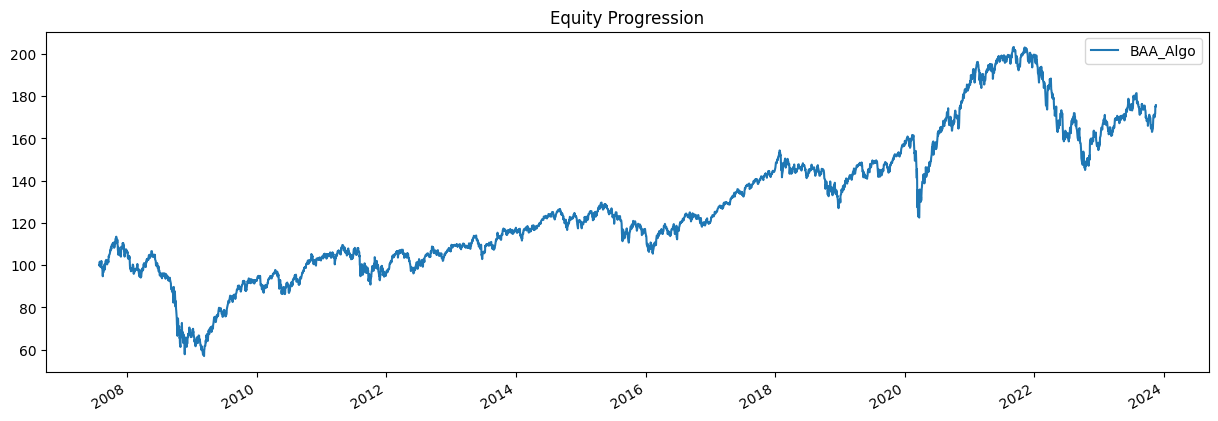

In [2]:
import bt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('./next_etf_data/aggressive.csv')
df['Index'] = pd.to_datetime(df['Date'].str.rstrip(), format='%Y-%m-%d %H:%M:%S')

df = df.set_index('Index')
df = df[['QQQ', 'VWO', 'VEA', 'BND']]

strategy = bt.Strategy('BAA_Algo', [
    bt.algos.SelectAll(),
    bt.algos.WeighEqually(),
    bt.algos.RunMonthly(),
    bt.algos.Rebalance()
])

backtest = bt.Backtest(strategy, df)
result = bt.run(backtest)

result.plot()
